In [9]:
library(repr)
library(dplyr)
library(ggrepel)
library(Seurat)
library(GOplot)

library(ggplot2)
library(patchwork)
library(enrichplot)
library(org.Mm.eg.db)
library(clusterProfiler)
library(SeuratDisk)

library(msigdbr)
library(GSVA)
library(pheatmap)


Warning message:
"package 'GSVA' was built under R version 4.2.3"
Warning message:
"package 'pheatmap' was built under R version 4.2.3"


'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(df$SYMBOL, fromType = "SYMBOL", toType = "ENTREZID", OrgDb = "org.Mm.eg.db"):
"9.71% of input gene IDs are fail to map..."
Warning message in geom_text_repel(data = subset(df[!(df[, "SYMBOL"] %in% c("")), :
"Ignoring unknown parameters: `max.oter`"
Warning message:
"ggrepel: 2076 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


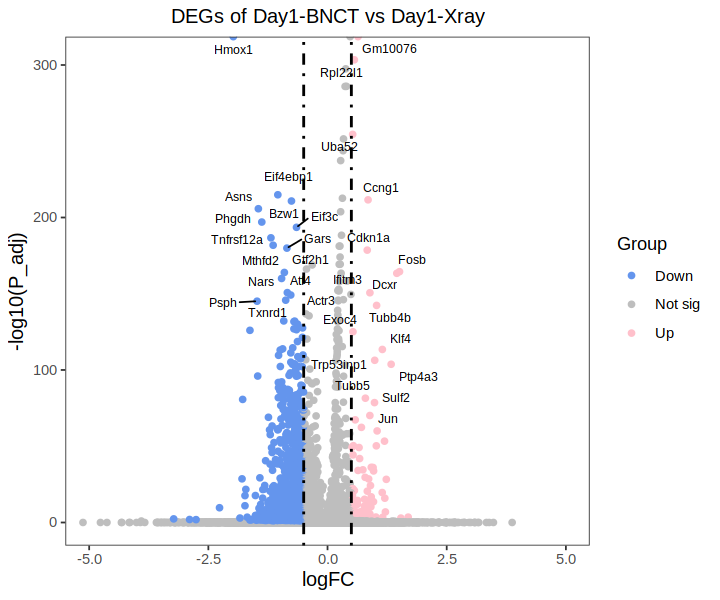

In [2]:
setwd("~/BNCT/B16") 

df = read.csv("./write/B16_Day0_allTumor_BNCT_vs_Xray.csv",header = T)  
colnames(df) <- c("SYMBOL","P_adj","logFC","score","Group")
df$Group = ifelse(df$logFC>=0.5 & df$P_adj<=0.05,"Up",ifelse(df$logFC<= -0.5 & df$P_adj<=0.05,"Down","Not sig"))

df_id<-bitr(df$SYMBOL, fromType = "SYMBOL", toType = "ENTREZID", OrgDb = "org.Mm.eg.db") 
df_all <- merge(df,df_id,by="SYMBOL",all=F) 
df_all_sort <- df_all[order(df_all$logFC, decreasing = T),] 
filter <- (df_all_sort$P_adj <0.1)
gene_fc = df_all_sort[filter,"logFC"] 
names(gene_fc) <-df_all_sort[filter,"ENTREZID"] 

options(repr.plot.width=6,repr.plot.height=5)
df = df[! (df[,'SYMBOL'] %in% c('C1qa','C1qb','C1qc','Spp1', 'Apoe','Igkc','Cd68', 'Trem2')), ] 
ggplot(df,aes(x=logFC,y = -log10(P_adj)))+
  geom_point(aes(color=Group))+
  scale_color_manual(values = c( "cornflowerblue","grey","pink"))+
  theme_bw()+
  geom_vline(xintercept=c(-0.5,0.5),lty=4,col="black",lwd=0.8) +
  theme(plot.title = element_text(size=12,hjust = 0.5), 
        axis.title.x = element_text(size=12,hjust = 0.5),
        axis.title.y = element_text(size=12,hjust = 0.5),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank()) +
  coord_cartesian(xlim = c(-5,5)) + 
  ggtitle('DEGs of Day1-BNCT vs Day1-Xray') +
  geom_text_repel(data=subset(df[! (df[,'SYMBOL'] %in% c('')),],
                                    df$P_adj<=0.05 & abs(df$logFC)>=0.5), aes(label=SYMBOL), size=2.6, force=TRUE,max.oter=10000000,point.padding=NA)


In [3]:
up_go = df_all_sort[df_all_sort$Group=="Up",] 
up_go_list = up_go$logFC
names(up_go_list) = up_go$SYMBOL
up_go_list = sort(up_go_list )

day0.enrich.go <- enrichGO(gene = up_go$SYMBOL,
    OrgDb = "org.Mm.eg.db",
    keyType = 'SYMBOL',  #指定给定的基因名称类型，例如这里以 entrze id 为例
    ont = 'ALL',  #GO Ontology，可选 BP、MF、CC，也可以指定 ALL 同时计算 3 者
    maxGSSize = 300,
    pAdjustMethod = 'fdr',  #指定 p 值校正方法
    pvalueCutoff = 0.05,  #指定 p 值阈值（可指定 1 以输出全部）
    qvalueCutoff = 0.05,  #指定 q 值阈值（可指定 1 以输出全部）
    readable = FALSE
)


'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(df$SYMBOL, fromType = "SYMBOL", toType = "ENTREZID", OrgDb = "org.Mm.eg.db"):
"9.71% of input gene IDs are fail to map..."


[1] 6.772979 6.568825 6.020059 5.578653 5.294202 5.280193

Warning message in geom_text_repel(data = subset(df[!(df[, "SYMBOL"] %in% c("Timp2", :
"Ignoring unknown parameters: `max.oter`"
Warning message in geom_text_repel(data = subset(df[(df[, "SYMBOL"] %in% c("Tnf", :
"Ignoring unknown parameters: `max.oter`"
Warning message:
"Removed 7 rows containing missing values or values outside the scale range
(`geom_text_repel()`)."
Warning message:
"ggrepel: 3319 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


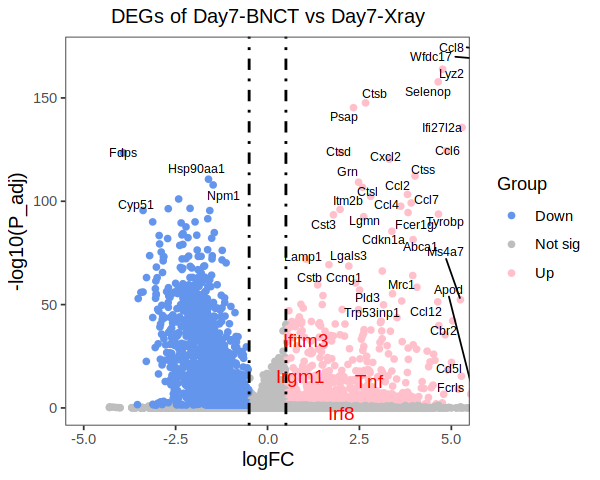

In [4]:
setwd("~/BNCT/B16") 

df = read.csv("./write/B16_Day7_allTumor_BNCT_vs_Xray.csv",header = T)  
colnames(df) <- c("SYMBOL","P_adj","logFC","score","Group")
df$Group = ifelse(df$logFC>=0.5 & df$P_adj<=0.05,"Up",ifelse(df$logFC<= -0.5 & df$P_adj<=0.05,"Down","Not sig"))

df_id<-bitr(df$SYMBOL, fromType = "SYMBOL", toType = "ENTREZID", OrgDb = "org.Mm.eg.db") 
df_all <- merge(df,df_id,by="SYMBOL",all=F) 
df_all_sort <- df_all[order(df_all$logFC, decreasing = T),] 
filter <- (df_all_sort$P_adj <0.1)
gene_fc = df_all_sort[filter,"logFC"]
head(gene_fc)
names(gene_fc) <- df_all_sort[filter,"ENTREZID"] 

options(repr.plot.width=5,repr.plot.height=4)
df = df[! (df[,'SYMBOL'] %in% c('C1qa','C1qb','C1qc','Spp1', 'Apoe','Igkc','Cd68', 'Trem2')), ] 
ggplot(df,aes(x=logFC,y = -log10(P_adj)))+
  geom_point(aes(color=Group))+
  scale_color_manual(values = c( "cornflowerblue","grey","pink"))+
  theme_bw()+
  geom_vline(xintercept=c(-0.5,0.5),lty=4,col="black",lwd=0.8) +
  theme(plot.title = element_text(size=12,hjust = 0.5), 
        axis.title.x = element_text(size=12,hjust = 0.5),
        axis.title.y = element_text(size=12,hjust = 0.5),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank()) +
  coord_cartesian(xlim = c(-5,5)) + 
  ggtitle('DEGs of Day7-BNCT vs Day7-Xray') +
  geom_text_repel(data=subset(df[! (df[,'SYMBOL'] %in% c('Timp2','Dusp1','Pf4','Laptm5','Plek','Tmsb','Pltp','Mafb')),],
                                    df$P_adj<=0.01 & abs(df$logFC)>1), aes(label=SYMBOL), size=2.6, force=TRUE,max.oter=10000000,point.padding=NA) +
  geom_text_repel(data=subset(df[ (df[,'SYMBOL'] %in% c('Tnf','Irf8','Ifitm3','Irgm1')),]), aes(label=SYMBOL), color='red', size=4, force=TRUE,max.oter=10000000,point.padding=NA)



In [5]:
up_go = df_all_sort[df_all_sort$Group=="Up",] 
up_go_list = up_go$logFC
names(up_go_list) = up_go$SYMBOL
up_go_list = sort(up_go_list )

day7.enrich.go <- enrichGO(gene = up_go$SYMBOL,
    OrgDb = "org.Mm.eg.db",
    keyType = 'SYMBOL',  #指定给定的基因名称类型，例如这里以 entrze id 为例
    ont = 'ALL',  #GO Ontology，可选 BP、MF、CC，也可以指定 ALL 同时计算 3 者
    maxGSSize = 300,
    pAdjustMethod = 'fdr',  #指定 p 值校正方法
    pvalueCutoff = 0.05,  #指定 p 值阈值（可指定 1 以输出全部）
    qvalueCutoff = 0.05,  #指定 q 值阈值（可指定 1 以输出全部）
    readable = FALSE
)
  

In [6]:
day0_go = c('cellular response to radiation', 'cellular response to gamma radiation', 'DNA damage checkpoint signaling', 
   'negative regulation of G1/S transition of mitotic cell cycle',
  'interleukin-1-mediated signaling pathway', 'mitotic G1 DNA damage checkpoint signaling')  # 'DNA damage response, signal transduction by p53 class mediator resulting in cell cycle arrest',
day0_enrich = day0.enrich.go[day0.enrich.go$Description %in% day0_go]
day0_enrich[,'time'] = 'Day1'

day7_go = c('myeloid leukocyte migration', 'myeloid leukocyte activation',  'interleukin-6 production', 'chemokine-mediated signaling pathway',
           'antigen processing and presentation', 'response to interferon-gamma' )
day7_enrich = day7.enrich.go[day7.enrich.go$Description %in% day7_go]
day7_enrich[,'time'] = 'Day7'


In [7]:
bnct_enrich = rbind(day0_enrich, day7_enrich)
bnct_enrich[,'GeneRatio'] = sapply(bnct_enrich[,'GeneRatio'], function(x) round(eval(parse(text = x)),2) )
bnct_enrich[bnct_enrich$Description == 'negative regulation of G1/S transition of mitotic cell cycle','Description'] = 'negative regulation of mitotic cell cycle'


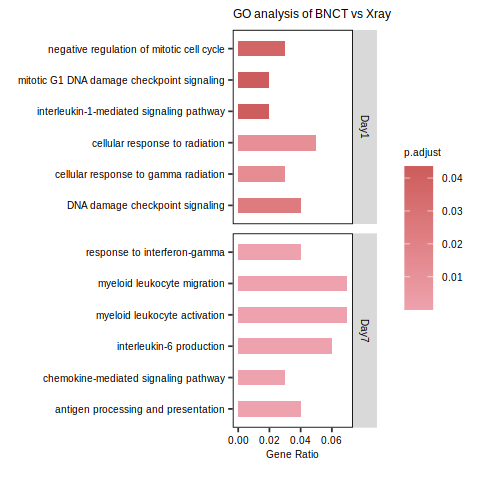

In [8]:
options(repr.plot.width=4,repr.plot.height=4)

ggplot(bnct_enrich, aes(Description, GeneRatio)) +
  geom_col(aes(fill = p.adjust), width = 0.5, show.legend = TRUE) +
  # scale_fill_brewer(palette = 'RdBu') + 
  scale_fill_gradient(low = "lightpink2", high = "indianred") +
  facet_grid(time~., scale = 'free_y', space = 'free_y') +
  theme(panel.grid = element_blank(), panel.background = element_rect(color = 'black', fill = 'transparent'),
        axis.text = element_text(size = 6, color = 'black'),  
        axis.title = element_text(size = 6, color = 'black'),
        strip.text = element_text(size = 6, color = 'black'), 
        legend.text = element_text(size = 6, color = 'black'), 
        legend.title = element_text(size = 6, color = 'black'),
        title = element_text(size = 6, color = 'black') 
       ) +
  coord_flip() +
  ggtitle('GO analysis of BNCT vs Xray') +
  labs(x = '', y = 'Gene Ratio\n') 


In [10]:
expr_df <- read.csv("/home/zhaoyp/BNCT/B16/write/cancerSubtypeExprGSVA.csv",header=TRUE, row.names=1)
expr_df <-  as.matrix(t(expr_df))

In [11]:
mouse <- msigdbr(species = "Mus musculus")
mouse_GO_bp = msigdbr(species = "Mus musculus",
                      category = 'H') %>% 
                      dplyr::select(gs_name,gene_symbol)#这里可以选择gene symbol，也可以选择ID，根据自己数据需求来，主要为了方便
mouse_GO_bp_Set = mouse_GO_bp %>% split(x = .$gene_symbol, f = .$gs_name)#后续gsva要求是list，所以将他转化为list


Warning message:
"useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = FALSE."


Estimating GSVA scores for 50 gene sets.
Estimating ECDFs with Gaussian kernels
  |======================================================================| 100%



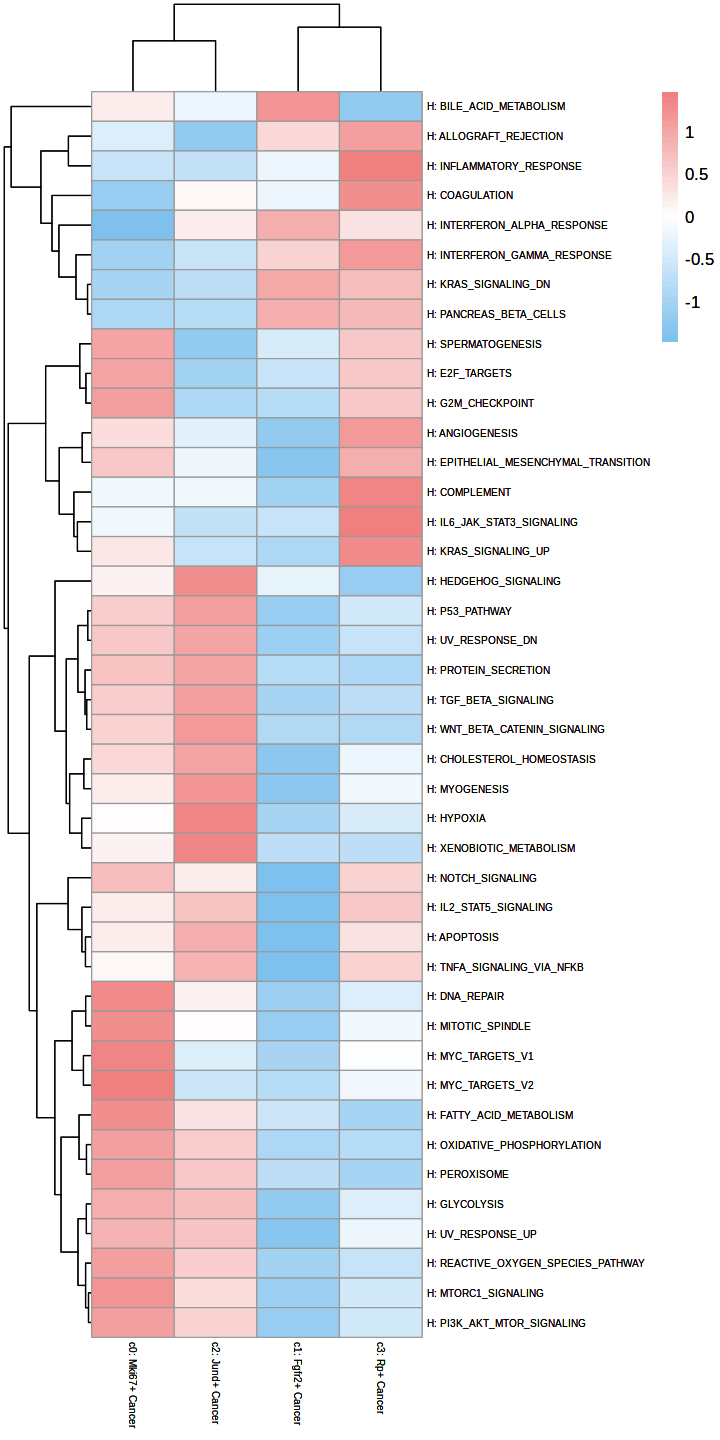

In [12]:
subset_gsva1 <- gsva(expr_df , gset.idx.list = mouse_GO_bp_Set, method='gsva') 

options(repr.plot.width=6 ,repr.plot.height=12)
rownames(subset_gsva1) <- sapply(rownames(subset_gsva1), function(x) paste0('H: ', substr(x, 10, nchar(x)) ) )
subset_gsva1 = subset_gsva1[! rownames( subset_gsva1) %in% c('H: ANDROGEN_RESPONSE', 'H: ADIPOGENESIS', 'H: APICAL_JUNCTION', 'H: APICAL_SURFACE', 'H: ESTROGEN_RESPONSE_EARLY',
                               'H: ESTROGEN_RESPONSE_LATE', 'H: HEME_METABOLISM','H: UNFOLDED_PROTEIN_RESPONSE'), ]

p<-pheatmap(subset_gsva1, show_colnames=T, show_rownames=T, scale='row',fontsize_row = 6,fontsize_col = 6, #cluster,
         color=colorRampPalette(c('skyblue2','white','lightcoral'))(50))
p
